In [1]:
#https://machinelearningmastery.com/voting-ensembles-with-python/

In [2]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier
 
# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2)
    return X, y

In [3]:
#ORIGINAL
# get a voting ensemble of models
def get_voting():
    # define the base models
    models = list()
    models.append(('svm1', SVC(probability=True, kernel='poly', degree=1)))
    models.append(('svm2', SVC(probability=True, kernel='poly', degree=2)))
    models.append(('svm3', SVC(probability=True, kernel='poly', degree=3)))
    models.append(('svm4', SVC(probability=True, kernel='poly', degree=4)))
    models.append(('svm5', SVC(probability=True, kernel='poly', degree=5)))
    # define the voting ensemble
    ensemble = VotingClassifier(estimators=models, voting='soft')
    return ensemble
 
# get a list of models to evaluate
def get_models():
    models = dict()
    models['svm1'] = SVC(probability=True, kernel='poly', degree=1)
    models['svm2'] = SVC(probability=True, kernel='poly', degree=2)
    models['svm3'] = SVC(probability=True, kernel='poly', degree=3)
    models['svm4'] = SVC(probability=True, kernel='poly', degree=4)
    models['svm5'] = SVC(probability=True, kernel='poly', degree=5)
    models['voting'] = get_voting()
    return models

In [4]:
#CUSTOM
# get a voting ensemble of models
from sklearn.tree import DecisionTreeClassifier
def get_voting():
    # define the base models
    models = list()
    models.append(('RF1', RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)))
    models.append(('RF2', RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)))
    models.append(('RF3', RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)))
    # define the voting ensemble
    ensemble = VotingClassifier(estimators=models, voting='hard')
    return ensemble
 
# get a list of models to evaluate
def get_models():
    models = dict()
    models['RF1'] =  RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
    models['RF2'] =  RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
    models['RF3'] =  RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
    models['voting'] = get_voting()
    return models

>RF1 0.870 (0.038)
>RF2 0.870 (0.027)
>RF3 0.867 (0.034)
>voting 0.867 (0.027)


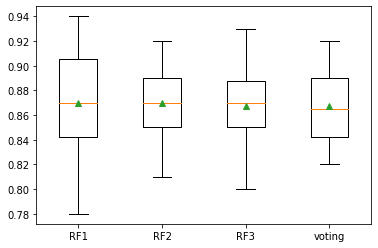

In [5]:
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()